By Ida Johanne Austad

# A description of the data, including its origin and quality issues.

The data analysed in this coursework has been gathered for and in collaboration with the World Health Organization (WHO). The dataset includes data on probability of dying from any cardiovascular disease, cancer, diabetes, or chronic respiratory condition and on crude suicide. The numbers show data for the years 2000-2016, and for both female and male. In this course work the focus is on the data gathered on suicide for male and female in the year 2016, which are presented at a rate per 100 000 in the population. The focus will be on comparing rates between genders, rather than between countries <br> 
<br>

WHO is an internationally renowned organisation, and a part of the United Nations, focusing on international public health. Based on this and the fact one of their main activities is performing or facilitating research - one can assume that their research holds high quality. To investigate this further one can read what they have published about their research methodologies and data quality. For instance, in their "Code of Conduct for responsible Research" they are committed ensure that the research they are involved in holds the highest standards of scientific quality and ethical integrity. They further describe how they work with their partners in research to ensure this research quality - through for instance data quality management routines, peer reviews and audits etc (2). For more detail on the data collected in the dataset which we are investigating here, one can read about the methodology and data described in a separate document (3).<br>
<br>

Overall, based on these considerations, sufficient for the purpose of performing this coursework, we can reasonably assume that the data we are to analyse is of good quality. If refering to Professor Spiegelhalter's Star rating the data could hold at least 3 stars, taking into consideration that suicide is a difficult and taboo related subject which may affect the quality. How this has been taken into account in the data gathering for this research would require further investigation. However, this is one reason why the data quality may not hold 4 stars. <br>
<br> 

# Initial visual investigation of the data

In [15]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
# Read in the data as a Pandas frame
file = pd.read_csv('suicide.csv')

In [17]:
#Create pandas dataframe for our data 
#one column for Country and one for Suicide rate 
bool1 = file['Year'] == 2016
suicide_2016 = file[bool1]
female_s = suicide_2016.loc[:,['Country', 'Crude suicide rates female']]
male_s = suicide_2016.loc[:,['Country', 'Crude suicide rates male']]

In [5]:
#Create numpy array for our data
f = female_s['Crude suicide rates female'].values
m = male_s['Crude suicide rates male'].values

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


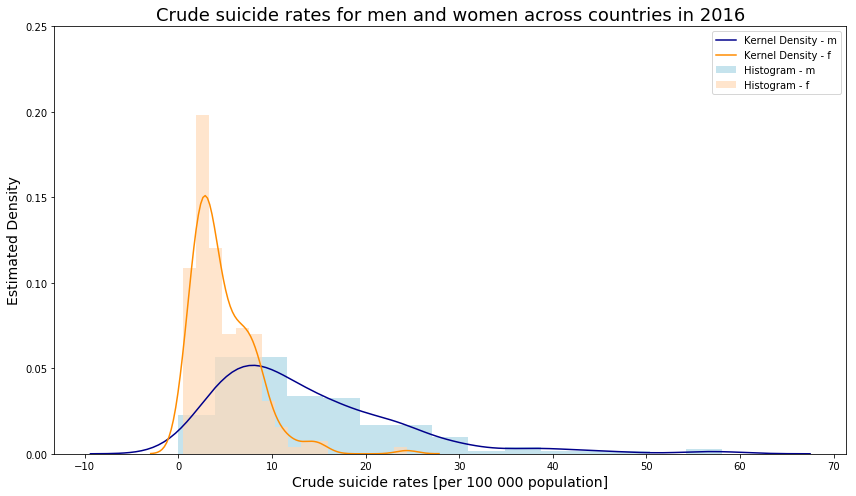

In [18]:
#Plot the data for female and male together in the same plot 
plt.figure(figsize=(12,7))

ax = sns.distplot(m,rug=False,
         kde_kws={"label": "Kernel Density - m", "color": "darkblue" },
         hist_kws={"label": "Histogram - m", "color": "lightblue", 'alpha':0.7}
        )

ax = sns.distplot(f,rug=False,
         kde_kws={"label": "Kernel Density - f", "color": "darkorange"},
         hist_kws={"label": "Histogram - f", "color": "peachpuff", 'alpha':0.7}
        )

plt.title('Crude suicide rates for men and women across countries in 2016', 
          fontsize=18)
plt.xlabel('Crude suicide rates [per 100 000 population]', fontsize=14)
plt.ylabel('Estimated Density', fontsize=14)
plt.ylim((0,0.25))
plt.legend()
plt.tight_layout()
plt.show()

By visually inspecting the plot above we can see several things. Both the distribution for male and female are skewed to the right. Moreover, the distribution for males has a larger spread (variance) than for females. The plot suggests that the central tendency for males is larger than for females and that there are certain countries where the suicide rates amongst males is high, and much higher than for other countries and for females in general. We will further investigate these ideas below.

# Calculating central tendency using different measures

In [19]:
# Calculating mean and median for male and female
mean_f = np.mean(f)
mean_m = np.mean(m)
median_f = np.median(f)
median_m = np.median(m)

print("The mean for the male and female data respectively are " + 
      str(round(mean_m, 2)) + " and " + str(round(mean_f, 2)))
print("The median for the male and female data respectively are " + 
      str(median_m) + " and " + str(median_f))

The mean for the male and female data respectively are 13.82 and 4.84
The median for the male and female data respectively are 11.3 and 3.7


In [20]:
# Calculating mode for male
xk,yk = ax.get_lines()[0].get_data()
mode_m = xk[np.argmax(yk)]

# Calculating mode for female
xk,yk = ax.get_lines()[1].get_data()
mode_f = xk[np.argmax(yk)]

print("The mode for the male and female data respectively are " + 
      str(round(mode_m, 2)) + " and " + str(round(mode_f, 2)))

The mode for the male and female data respectively are 8.17 and 2.87


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


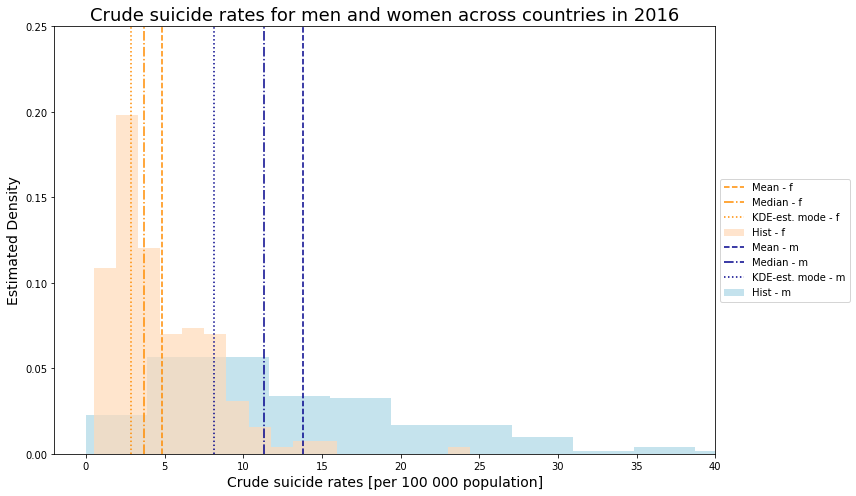

In [21]:
# Plotting the results along with the histogram

plt.figure(figsize=(12,7))

# Plotting central tendency calculations
xx = np.ones(2)
yy = np.array([0, 0.8])
plt.plot(mean_f*xx,yy,'--b',label='Mean - f', color="darkorange")
plt.plot(median_f*xx,yy,'-.r',label='Median - f', color="darkorange")
plt.plot(mode_f*xx,yy,':m',label='KDE-est. mode - f', color="darkorange")
plt.plot(mean_m*xx,yy,'--b',label='Mean - m', color = "darkblue")
plt.plot(median_m*xx,yy,'-.r',label='Median - m', color = "darkblue")
plt.plot(mode_m*xx,yy,':m',label='KDE-est. mode - m', color="darkblue")

# Plotting histograms
ax = sns.distplot(m,rug=False,
                 kde_kws={"color": "darkblue", 'alpha':0.0 },
                 hist_kws={"label": "Hist - m", "color": "lightblue", 'alpha':0.7}
                 )
ax = sns.distplot(f,rug=False,
                 kde_kws={"color": "darkorange", 'alpha':0.0 },
                 hist_kws={"label": "Hist - f", "color": "peachpuff", 'alpha':0.7}
                )

# Adding titles and adjusting scales
plt.title('Crude suicide rates for men and women across countries in 2016', 
          fontsize=18)
plt.xlabel('Crude suicide rates [per 100 000 population]', fontsize=14)
plt.ylabel('Estimated Density', fontsize=14)
plt.ylim((0,0.25))
plt.xlim((-2,40)) #cut of the tail of the male distribution to focus on the central tendencies

# Adjusting legend
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1], handles[2],handles[7], 
           handles[3], handles[4],handles[5], handles[6]]
labels = [labels[0], labels[1], labels[2], labels[7], 
          labels[3], labels[4], labels[5], labels[6]]
plt.legend(handles,labels,loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

The plot above supports some of our initial thoughts. The estimates for central tendency for males are higher than those for females. As such we can see that i.g. men commit suicide more often than women. Still, from the histograms we see that there are some rates which are high for female as well. Whether there are countries where females commit suicide more often than males would require further investigation. Moreover, for both women and men - the mean is to the right of the median which supports that the distributions are right skewed.

# Calculating variance, skewness and kurtosis

In addition to variance, which is asked for explicitly in the coursework, we calculate skew and kurtosis to investigate the structure of the data beyond the visual inspection performed above.

In [22]:
# Variance
var_f = np.var(f, ddof = 1)
var_m = np.var(m, ddof = 1)

print("The unbiased variance for the male and female data respectively are " + 
      str(round(var_m, 2)) + " and " + str(round(var_f, 2)))

The unbiased variance for the male and female data respectively are 99.05 and 11.34


The variance support what the visual inspection of the plots above suggested - that the variance is much bigger for males compared to females.

In [23]:
# Skew
ssf = np.sqrt(np.var(f))
skew_f = sp.stats.moment(f,3)/(ssf**3)

ssm = np.sqrt(np.var(m))
skew_m = sp.stats.moment(m,3)/(ssm**3)

print("The skew estimate for the male and female data respectively are " + 
      str(round(skew_m, 2)) + " and " + str(round(skew_f, 2)))

The skew estimate for the male and female data respectively are 1.65 and 1.78


The skew estimates support our visual inspection - it is right-skewed for both distributions.

In [24]:
# Kurtosis
kurtosis_f = (sp.stats.moment(f,4)/(ssf**4)) - 3
kurtosis_m = (sp.stats.moment(m,4)/(ssm**4)) - 3

print("The kurtosis estimate for the male and female data respectively are " + 
      str(round(kurtosis_m, 2)) + " and " + str(round(kurtosis_f, 2)))

The kurtosis estimate for the male and female data respectively are 3.66 and 5.82


Both for males and females the kurtosis estimate is larger than 3, suggesting that neither of these distributions are normal and that a part of their variance arises due to their tails compared to that of a normal distribution. For males the estimate is quite a lot larger than 3. This support the plots above, which suggests that some countries have very high rates of suicide amongst men.

# Are these analysis methods appropriate for the problem/data?

The purpose of looking at these data was firstly to compare suicide rates between genders, but also partly to look at the rates per gender without comparison. <br>
<br>

To estimate the central tendency for each gender by itself, the mean and median where both useful as they told us something about the distribution in terms of both central tendency and skew. Modes where not as useful here, partly because both distributions only have one "clear" mode. When comparing the gender's distribution this is still the case, the difference between the modes does not tell us too much in addition to the means and medians<br>
<br>

Furthermore, calculating variance was a useful and appropriate both for analysing the genders apart and for comparison. The fact that there is variance amongst countries for each gender is interesting, and the fact that the difference in variance between the genders could result in many interesting hypothesis' as to why that is. <br>
<br>

Lastly, estimating the skew and kurtosis helped us further investigate the data structure and helped us support what we initially saw from the first visual inspection with numbers.

# References

(1) WHO data per region on suicide was downloaded from: http://apps.who.int/gho/data/node.sdg.3-4-data?lang=en <br>
(2) WHO Code of Conduct for responsible Research: http://www.who.int/about/ethics/en/ <br>
(3) WHO methods and data sources for country-level causes of death 2000-2016 http://terrance.who.int/mediacentre/data/ghe/GlobalCOD_method_2000_2016.pdf?ua=1 <br>